## Final Project Submission

Please fill out:
* Student name: Habshi Pedro Mwangi
* Student pace: self paced / part time / full time: Full time
* Scheduled project review date/time: Sunday
* Instructor name: Lucille Kaleha
* Blog post URL:


We are looking at aviation risk assessment.
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

The dataset is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.


The project will follow these main steps:

- Data Cleaning: This involves handling missing values and ensuring data consistency.

- Data Visualization: Visuals will be created to present the findings.

- Business Insights: Based on the analysis, we will create recommendations for better decisions in the aviation industry.

In [5]:
# Your code here - remember to use markdown cells for comments as well!
#Library for data manipulation
import pandas as pd 
# Library for number operations
import numpy as np   
#Library for data visualizations
import matplotlib.pyplot as plt  
#Library for enhanced visualizations
import seaborn as sns  
#Seaborn style for extra visuals
sns.set(style="whitegrid")

Now that all libraries have been imported we need to import the CSV file that holds the dataset for aviation risk

In [6]:
#Now we load the dataset
#Setting low memory When you loading the CSV data to false to help pandas better handle columns with mixed data
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
#Let's display the first few rows to understand the structure of the data 
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Here are the key steps to data cleaning:
1. We need to inspect the data by looking at the shape of rows and columns of the dataset.

In [7]:
#To begin cleaning we first have to inspect the data
#Let's look at the shape of the dataset to show the rows and columns
print(df.shape)


(90348, 31)


2. For precise and consistent data analysis we need to study the data columns and change to the correct ones if any errors. For example 'Event.Date' is either integer or datetime datatype

In [8]:
#Let's see the data types 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Once identified the columns with incorrect data types we need to convert them into the right data types.

In [9]:
#Convert data types
#The date column should be set to datetime type. Lets convert from object to datetime to help on time analysis
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
#Latitude and Longitude are geometrical coordinates so they need to be in a numer format
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
#Number of engines should be whole figures
df['Number.of.Engines'] = df['Number.of.Engines'].astype('Int64')  # Int64 to allow for NaN values
#Numeric count of people should be integer type
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype('Int64')
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].astype('Int64')
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].astype('Int64')
df['Total.Uninjured'] = df['Total.Uninjured'].astype('Int64')
#Converting weather condition to category
df['Weather.Condition'] = df['Weather.Condition'].astype('category')
#Converting aircraft damages to category
df['Aircraft.damage'] = df['Aircraft.damage'].astype('category')
#Change injury to category
df['Injury.Severity'] = df['Injury.Severity'].astype('category')
#Changing investigation and flight purpose of flight to category to save up on memory
df['Investigation.Type'] = df['Investigation.Type'].astype('category')
df['Purpose.of.flight'] = df['Purpose.of.flight'].astype('category')
#Converting columns to category for better analysis
df['Country'] = df['Country'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Make'] = df['Make'].astype('category')
df['Model'] = df['Model'].astype('category')
df['Registration.Number'] = df['Registration.Number'].astype('category')
df['Airport.Code'] = df['Airport.Code'].astype('category')
df['Airport.Name'] = df['Airport.Name'].astype('category')
df['FAR.Description'] = df['FAR.Description'].astype('category')
#Handling null values
# Separate numeric columns from non-numeric (categorical) columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Fill missing values for numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
 

A statistical summary gives information on the range, central tendency and numerical data understanding. We can can identify patterns, trends, and anomalies in your dataset.
These include:

    1.Mean: Average value, indicating the center of the data.
    
    2.Median: Middle value when the data is sorted, useful for skewed distributions.
    
    3.Standard Deviation: Measures the spread or variability of the data.
    
    4.Minimum and Maximum: Shows the range of the data.
    
    5.IQR: Indicate the spread of the data and help in identifying outliers.
    
This is needed for understanding the data, whether normally distributed, skewed, or if there are any potential outliers.

In [10]:
#Now let's find a statistical summary of the dataset
print(df.describe())

                          Event.Date      Latitude     Longitude  \
count                          88889  9.034800e+04  9.034800e+04   
mean   1999-09-17 17:13:39.354476032  5.630342e+02  6.074131e+03   
min              1948-10-24 00:00:00 -7.801695e+01 -1.742967e+02   
25%              1989-01-15 00:00:00  3.816736e+01 -9.547861e+01   
50%              1998-07-18 00:00:00  3.816736e+01 -9.547861e+01   
75%              2009-07-01 00:00:00  3.816736e+01 -9.547861e+01   
max              2022-12-29 00:00:00  7.302524e+06  5.965231e+07   
std                              NaN  4.959311e+04  5.904649e+05   

       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count            90348.0               90348.0                 90348.0   
mean            1.134347               0.55564                0.236607   
min                  0.0                   0.0                     0.0   
25%                  1.0                   0.0                     0.0   
50%              

3. Handle missing data.
   Missing values can be present in a dataset and we need to handle them depending on the goals for the analysis.
   We can replace missing values by:

    - Identify the missing data first
    - Remove rows with the missing values(We will be doing this)
    - Fill missing values (for numerical columns, replace NaN with the mean or median)
    - Another option is that you can replace missing values with a specific value
4. Handle duplicates .
   Duplicates can skew the results. By identifying and removing the duplicates makes the data unique:

       - Check for duplicates.
       - Remove any duplicates if found.
5. Handle outliers.
   Outliers can significantly affect statistical analyses and models, so identifying and handling them is crucial.
   We can identify the outliers with methods of statistics like IQR(Inter-Quartile Range)



   
       

In [11]:
#Now let's see for missing values in the dataset
print(df.isnull())

       Event.Id  Investigation.Type  Accident.Number  Event.Date  Location  \
0         False               False            False       False     False   
1         False               False            False       False     False   
2         False               False            False       False     False   
3         False               False            False       False     False   
4         False               False            False       False     False   
...         ...                 ...              ...         ...       ...   
90343     False               False            False       False     False   
90344     False               False            False       False     False   
90345     False               False            False       False     False   
90346     False               False            False       False     False   
90347     False               False            False       False     False   

       Country  Latitude  Longitude  Airport.Code  Airport.Name

In [12]:
#Now let's clean the data by remove rows that have missing values
df_clean = df.dropna()

In [13]:
#Let's remove any duplicates present in the data
df_clean = df.drop_duplicates()

In [14]:
#Aviation: Outliers might represent catastrophic accidents or unusual flight durations that need separate analysis for safety improvements.
#We need to handle the outliers in this dataset
# Outliers in aviation data can arise from various factors,  flight times, number of injuries, or accident severity.
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outliers = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)

# Remove outliers
df_no_outliers = df[~outliers.any(axis=1)]  # Exclude rows with outliers


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                90348 non-null  object        
 1   Investigation.Type      90348 non-null  category      
 2   Accident.Number         90348 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                90348 non-null  category      
 5   Country                 90348 non-null  category      
 6   Latitude                90348 non-null  float64       
 7   Longitude               90348 non-null  float64       
 8   Airport.Code            90348 non-null  category      
 9   Airport.Name            90348 non-null  category      
 10  Injury.Severity         90348 non-null  category      
 11  Aircraft.damage         90348 non-null  category      
 12  Aircraft.Category       90348 non-null  object

In [16]:
#Count the null values in each columns for cleaning
df.isnull().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                1459
Location                     0
Country                      0
Latitude                     0
Longitude                    0
Airport.Code                 0
Airport.Name                 0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Registration.Number          0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines            0
Engine.Type                  0
FAR.Description              0
Schedule                     0
Purpose.of.flight            0
Air.carrier                  0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
Publication.Date             0
dtype: int64

In [17]:
# Find median date to help with the missing values in ['Event.date'] column
date_median = df['Event.Date'].median()

# Fill missing values and assign back to the column
df['Event.Date'] = df['Event.Date'].fillna(date_median)
print(df['Event.Date'])

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
90343   2022-12-26
90344   2022-12-26
90345   2022-12-26
90346   2022-12-26
90347   2022-12-29
Name: Event.Date, Length: 90348, dtype: datetime64[ns]


In [18]:
#Final check on the updated dataframe for any null columns
df.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [19]:
#Help to verify the data types
print(df.dtypes)

Event.Id                          object
Investigation.Type              category
Accident.Number                   object
Event.Date                datetime64[ns]
Location                        category
Country                         category
Latitude                         float64
Longitude                        float64
Airport.Code                    category
Airport.Name                    category
Injury.Severity                 category
Aircraft.damage                 category
Aircraft.Category                 object
Registration.Number             category
Make                            category
Model                           category
Amateur.Built                     object
Number.of.Engines                  Int64
Engine.Type                       object
FAR.Description                 category
Schedule                          object
Purpose.of.flight               category
Air.carrier                       object
Total.Fatal.Injuries               Int64
Total.Serious.In

In [20]:
#Check for duplicates in data
print(df.duplicated().sum())
#This removes all the duplicate rows in the DataFrame and dataframe gets a new version with no duplicated .
df = df.drop_duplicates()

1390


In [21]:
df.columns = [col.replace(' ', '_') for col in df.columns]
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Now that the data is cleaned up. We need to create visualizations to help identify high and low risk measures.
Objectives:

 - Plot a chart to show distribution of aircraft categories.

 - Plot a chart to give an assessment on top 10 phases of flight leading to accidents.

 - Plot a chart to get  distribution of aircraft types in accidents so as to know whic aircraft types pose the highest risk.

 - Plot a timeline chart with milestones for the aircraft acquisition and safety roadmap where a horizontal timeline with milestones placed along it.


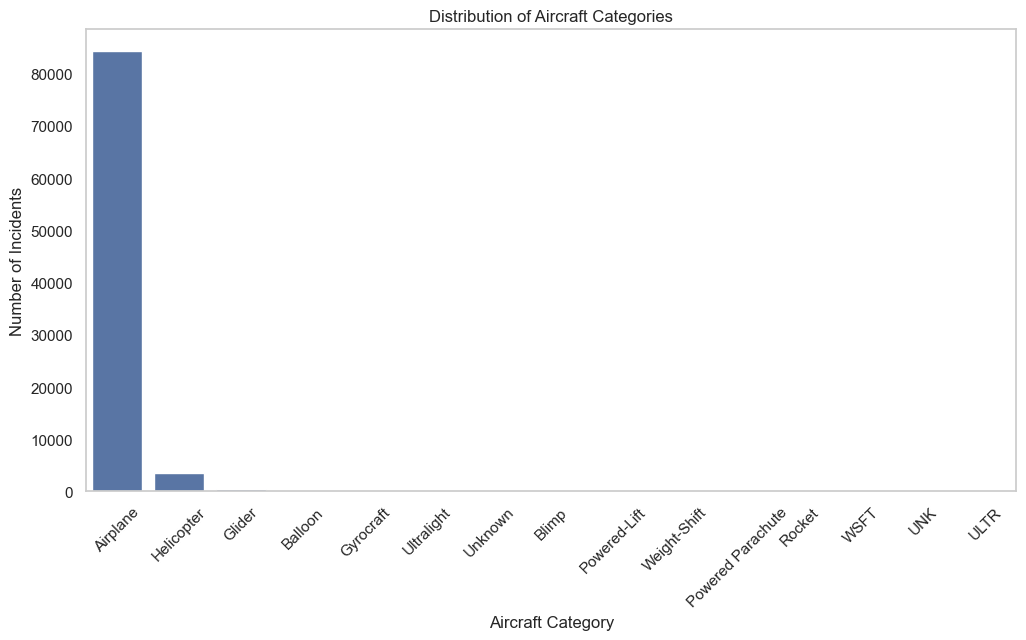

In [20]:
# Plot distribution of aircraft categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Aircraft.Category')
plt.title('Distribution of Aircraft Categories')
plt.xlabel('Aircraft Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


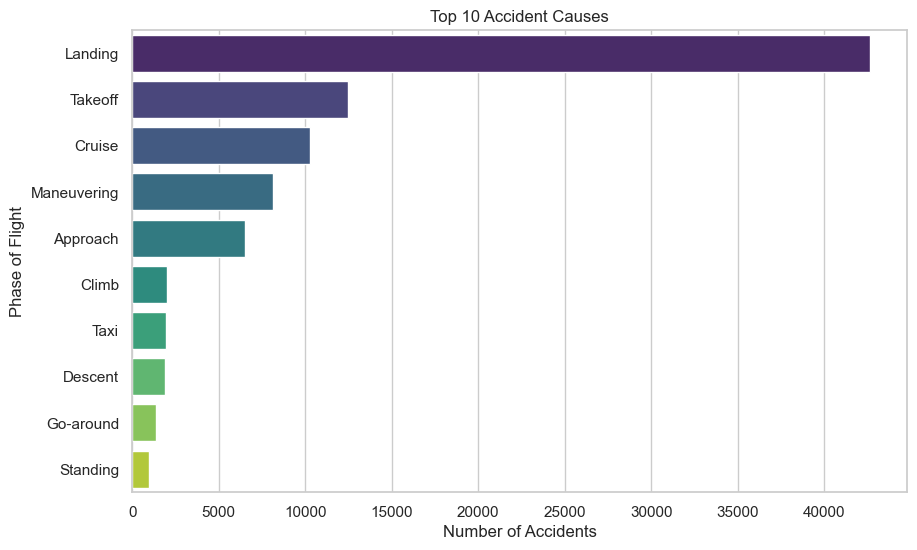

In [21]:
#Count the top 10 phases of flight leading to accidents
count_accident = df['Broad.phase.of.flight'].value_counts().head(10)
#Plotting the data to visualize each phase
plt.figure(figsize=(10, 6))
sns.barplot(x=count_accident.values, y=count_accident.index, palette='viridis', hue=count_accident.index, dodge=False, legend=False)
plt.title('Top 10 Accident Causes')
plt.xlabel('Number of Accidents')
plt.ylabel('Phase of Flight')
plt.show()


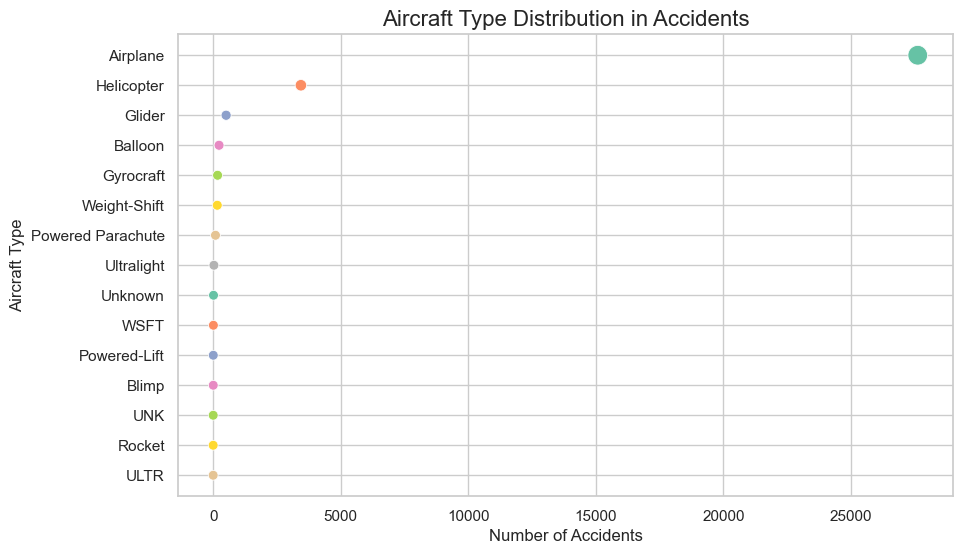

In [39]:
# Get  distribution of aircraft types
aircraft_type_dist = df_clean['Aircraft.Category'].value_counts()

# Set up the figure and axis for the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot: Use 'Aircraft.Category' as Y and count as X
sns.scatterplot(x=aircraft_type_dist.values, 
                y=aircraft_type_dist.index, 
                size=aircraft_type_dist.values,  # Size of points by the count
                hue=aircraft_type_dist.index,  # Color points by category
                sizes=(50, 200),  # Adjust size of points for visibility
                palette='Set2',  # Choose a color palette
                legend=None)  # No legend as categories are in Y

# Add title and labels
plt.title('Aircraft Type Distribution in Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Aircraft Type', fontsize=12)

# Display the plot
plt.show()

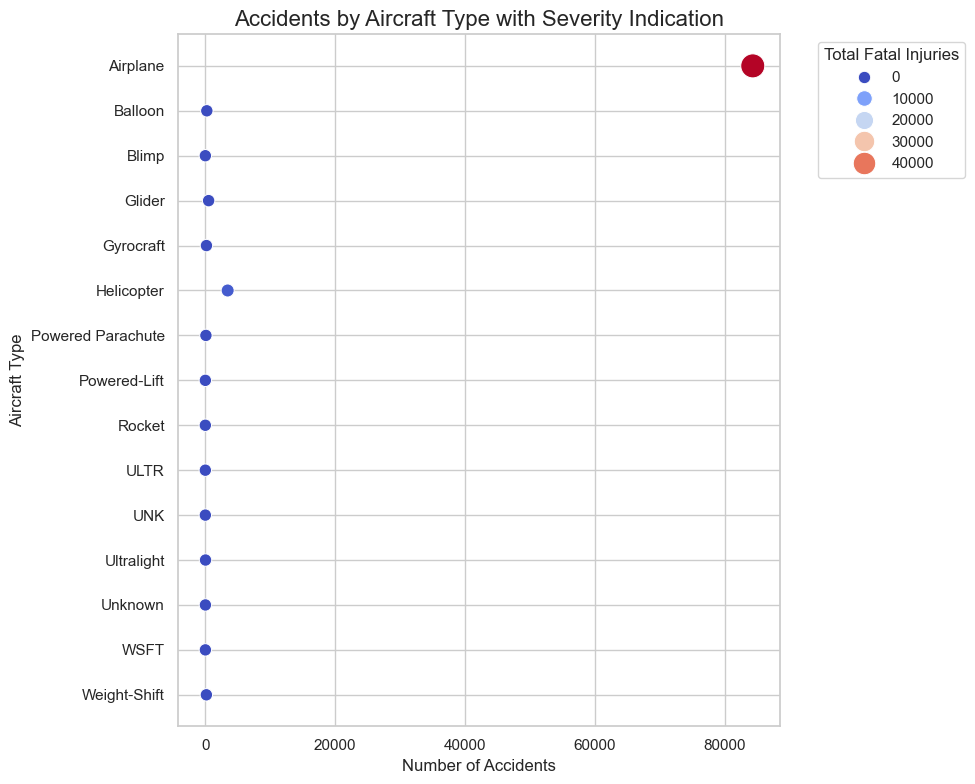

In [47]:
# Changing 'Accident.count' and 'Total.fatal.injuries' data to float to avoid errors
scatter_data['Accident.Count'] = scatter_data['Accident.Count'].astype(float)
scatter_data['Total.Fatal.Injuries'] = scatter_data['Total.Fatal.Injuries'].astype(float)

# Creating the plot size
plt.figure(figsize=(10, 8))
#Building the scatter plot
scatter = sns.scatterplot(
    #Data source
    data=scatter_data,
    #Horizontal axis showing the number of accidents
    x='Accident.Count',
    #This will be the vertical axis to show the aircraft category
    y='Aircraft.Category',
    #Determine size from the Total fatal injuries column 
    size='Total.Fatal.Injuries',
    #For the size range in the order(min, max size)
    sizes=(80, 300),
    #Color gradient based on the fatalities
    hue='Total.Fatal.Injuries',
    #Describe coolwarm color palette, so cooler tones represent fewer fatalities.
    palette='coolwarm',
    #Legend to describe bubble size and hue
    legend='brief'
)

# Customize the chart
#Label the legend
plt.title('Accidents by Aircraft Type with Severity Indication', fontsize=16)
#The labels for the X & Y axis
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Aircraft Type', fontsize=12)
#Total Fatal Injuries will be the label title which is placed outside the plot and gets top left allignment
plt.legend(title='Total Fatal Injuries', bbox_to_anchor=(1.05, 1), loc='upper left')
#For a grid in background for easier interpretation of data
plt.grid(True)
#This puts the plot in place to avoid overlapping
plt.tight_layout()

# Show Plot
plt.show()


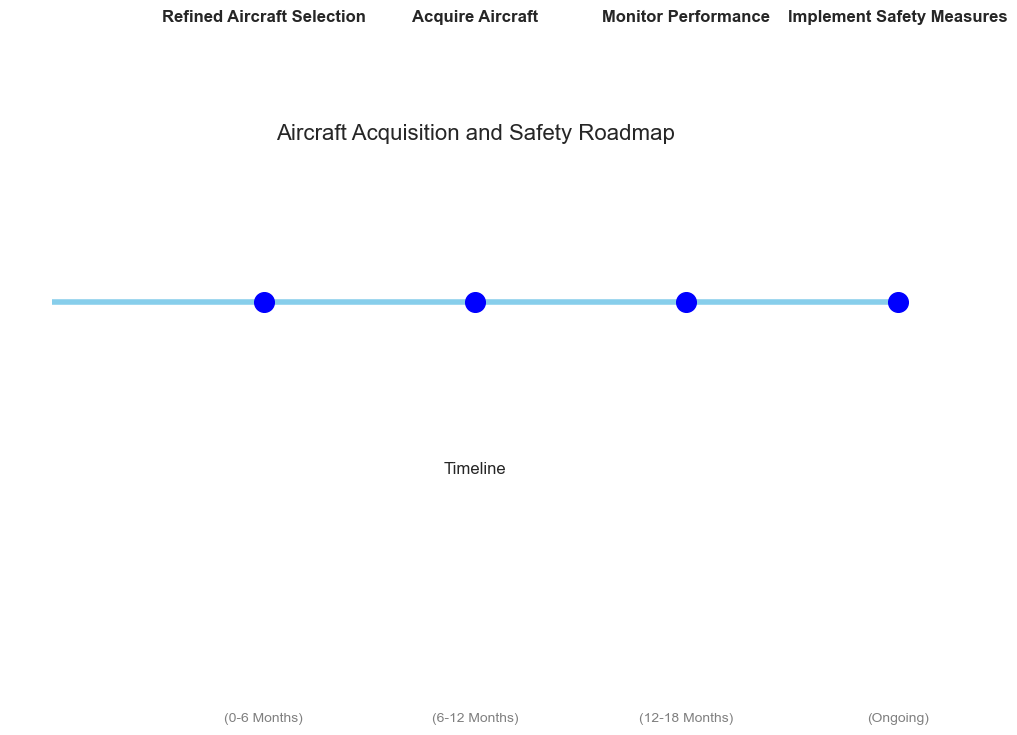

In [53]:
# Data to create the milestones
milestones = ['Refined Aircraft Selection', 'Acquire Aircraft', 'Monitor Performance', 'Implement Safety Measures']
timelines = ['0-6 Months', '6-12 Months', '12-18 Months', 'Ongoing']
# Milestone positions on the timeline
positions = [1, 2, 3, 4]  

# Create the chart frame
plt.figure(figsize=(12, 4))
# Horizontalline showing the timeline
plt.hlines(y=1, xmin=0, xmax=4, color='skyblue', linewidth=4)  

# Iterates through the positions, milestones, and timelines to put each milestone on the timeline
for pos, milestone, time in zip(positions, milestones, timelines):
    #Sets a point for each milestone
    plt.scatter(pos, 1, color='blue', s=200, zorder=5)
    #Adds labels for each milestone and timeline
    plt.text(pos, 1.1, milestone, ha='center', fontsize=12, fontweight='bold')  
    plt.text(pos, 0.85, f"({time})", ha='center', fontsize=10, color='gray')  

# Customize the chart
#Title for the chart
plt.title('Aircraft Acquisition and Safety Roadmap', fontsize=16)
#This will hide the Y and X-axis for cleaner visualization
plt.yticks([])  # Hide y-axis
plt.xticks([])  # Hide x-axis
#The x axis will have the label 'Timeline'
plt.xlabel('Timeline', fontsize=12)
#Remove the border around the plot 
plt.box(False)
#Display the plot
plt.show()

In [23]:
# Save the clean DataFrame as 'Clean_up_Aviation_Data.csv'
df.to_csv('Clean_up_Aviation_Data.csv', index=False)
